## Nosé-Hoover thermostat


Notebook prepared by F. Troni - Course of Statistical Mechanics (Kigali, 03/2025)

In this notebook we study the implementation of the Nosé-Hoover thermostat.

In [184]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

In [185]:
# Parameters
Np = 1000                 # number of particles
dim = 3                 # 3D system
L = 10                  # lenght of one side of the simulation box
dt = 0.01              # time step
N_steps = 10000          # number of integration steps
m = 1.0                 # m of particles
k = 1.0                 # spring constant
T_target = 300          # target temperature in Kelvin (K)
Q = 0.05                # thermostat m parameter
kB = 3.1668 * 1e-6      # Eh/K - Boltzmann constant

In [186]:
# harmonic oscillator function
def force(x):
    return - k * x

In [187]:
# Initialize positions and velocities randomly
np.random.seed(42)
positions = np.random.randn(Np, dim)
forces = force(positions)

velocities = []
std = np.sqrt(kB * T_target / m)   
for p in range(Np):
    velocities.append([np.random.normal(loc = 0.0, scale = np.sqrt(kB * T_target / m)) for i in range(3)])
velocities = np.array(velocities)

# Initialize Nose-Hoover variables
xi = 0.0  # Thermostat variable
eta = 0.0  # Extended variable for integration

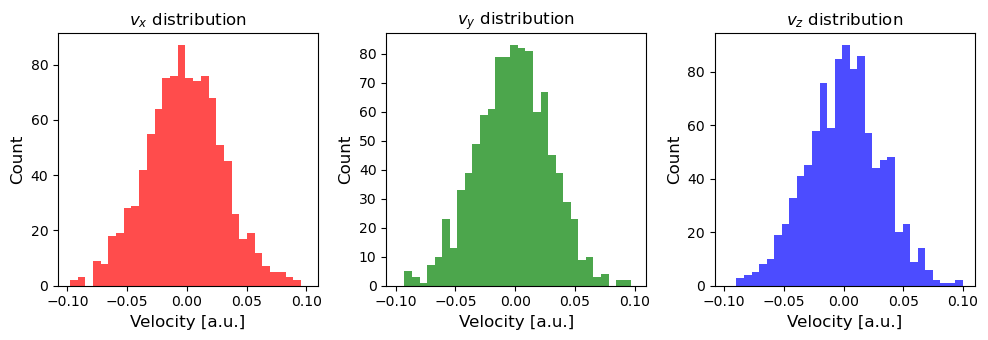

In [188]:
# Show velocities distributions with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3.5), sharex=True)

# Plot histograms
axes[0].hist(velocities[:,0], bins=30, color='r', alpha=0.7)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('$v_x$ distribution', fontsize=12)
axes[0].set_xlabel('Velocity [a.u.]', fontsize=12)

axes[1].hist(velocities[:,1], bins=30, color='g', alpha=0.7)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xlabel('Velocity [a.u.]', fontsize=12)
axes[1].set_title('$v_y$ distribution', fontsize=12)

axes[2].hist(velocities[:,2], bins=30, color='b', alpha=0.7)
axes[2].set_xlabel('Velocity [a.u.]', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].set_title('$v_z$ distribution', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [189]:
# Arrays to store temperature evolution
temperature_history = []

# Velocity-Verlet integration with Nose-Hoover thermostat
for step in range(N_steps):
    # Compute forces
    positions += velocities * dt + 0.5 * (forces / m - xi * velocities) * dt**2
   
    # Update velocity (half step)
    kinetic_energy = 0.5 * m * np.sum(velocities**2) # updated with v(t), not v(t + dt/2)
    velocities += 0.5 * (forces / m - xi * velocities) * dt
   
    # Update forces
    forces = force(positions)

    # Update thermostat variables
    xi += (dt / Q) * (kinetic_energy - 0.5 * (dim * Np + 1) * kB * T_target)
    
    kinetic_energy = 0.5 * m * np.sum(m * velocities**2) # updated with v(t + dt/2)
    xi += (dt / Q) * (kinetic_energy - 0.5 * (dim * Np + 1) * kB * T_target)
    eta += xi * dt  # Accumulate thermostat variable

    # Update velocity (another half step)
    velocities = (velocities + 0.5 * (forces / m) * dt) / (1 + 0.5 * xi * dt)
    # instantaneous temperature
    temperature = m * np.sum(velocities**2) / (dim * Np * kB)
    temperature_history.append(temperature)


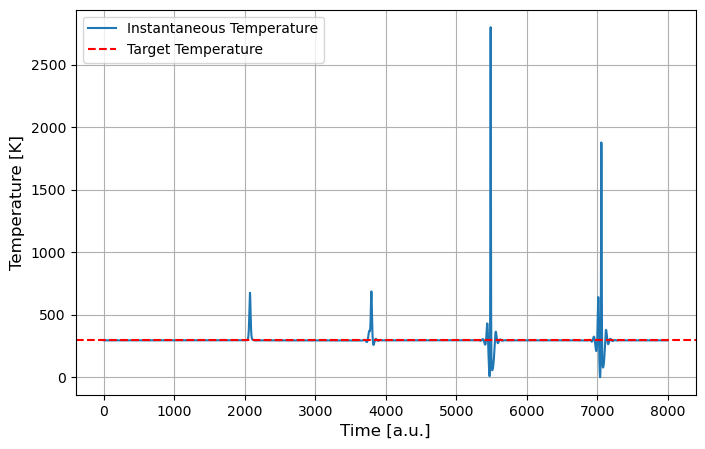

In [191]:
# Plot temperature evolution
plt.figure(figsize=(8, 5))
plt.plot(temperature_history[2000:], label="Instantaneous Temperature")
plt.axhline(T_target, color='r', linestyle='--', label="Target Temperature")
plt.xlabel("Time [a.u.]", fontsize=12)
plt.ylabel("Temperature [K]", fontsize=12)
# plt.ylim([T_target - 100, T_target + 100])
plt.legend(fontsize=10)
plt.grid()
plt.show()